In [2]:
import pandas as pd
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

In [3]:
# Importing the dataset
dataset_clean = pd.read_csv('../datasets_clean/incidents_clean.csv', low_memory=True, index_col=0)
dataset_original=pd.read_csv('../datasets_original/incidents.csv', low_memory=False)


In [4]:
dataset_clean['avg_age_participants'] = dataset_original['avg_age_participants']


In [5]:
def convert_to_float(x):
    """
    This function converts a string to float if possible, and to NaN otherwise.
    """
    try:
        return float(x)

    except ValueError:
        return np.nan

dataset_clean['avg_age_participants'] = dataset_clean['avg_age_participants'].apply(convert_to_float)

In [6]:
#Clean ages by deleting negative values and outliers
dataset_clean['avg_age_participants'] = dataset_clean['avg_age_participants'].apply(lambda x: np.nan if (x<0 or x>100)  else x)

In [7]:
# split the dataset into known and unknown ages
dataset_known_ages = dataset_clean[dataset_clean['avg_age_participants'].notnull()]
dataset_unknown_ages = dataset_clean[dataset_clean['avg_age_participants'].isnull()]


In [8]:

# drop columns with missing values
dataset_known_ages = dataset_known_ages.dropna(axis=1, how='any')


In [9]:
dataset_known_ages.head()

,date,state,city_or_county,latitude,longitude,avg_age_participants,n_participants_child,n_participants_teen,n_participants_adult,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,incident_characteristics1,year
0,2015-05-02,Indiana,Indianapolis,39.8322,-86.2492,19.0,0.0,0.0,1.0,1.0,0.0,0,1,0.0,0.0,1.0,Shot - Wounded/Injured,2015.0
1,2017-04-03,Pennsylvania,Kane,41.6645,-78.7856,62.0,0.0,0.0,1.0,1.0,0.0,1,0,0.0,0.0,1.0,"Shot - Dead (murder, accidental, suicide)",2017.0
5,2014-01-18,North Carolina,Wayne County,35.1847,-77.9527,65.0,0.0,0.0,1.0,1.0,0.0,0,1,0.0,0.0,1.0,Shot - Wounded/Injured,2014.0
6,2018-01-25,Louisiana,Zachary,30.6069,-91.2270,26.0,0.0,0.0,5.0,5.0,0.0,2,1,2.0,0.0,5.0,Shot - Wounded/Injured,2018.0
8,2016-08-01,Virginia,Stafford,38.3008,-77.4469,65.0,0.0,0.0,1.0,1.0,0.0,1,0,0.0,0.0,1.0,"Shot - Dead (murder, accidental, suicide)",2016.0


In [10]:
# y= avg_age_participants
# X= all other numerical columns
columns_X=dataset_known_ages.columns.drop(['avg_age_participants', 'city_or_county', 'incident_characteristics1', 'date', 'state', 'year', 'latitude', 'longitude'] )
X= dataset_known_ages[columns_X]
y= dataset_known_ages['avg_age_participants']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [12]:
X_train

,n_participants_child,n_participants_teen,n_participants_adult,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants
171508,0.0,0.0,7.0,7.0,0.0,2,2,0.0,3.0,7.0
212627,0.0,1.0,0.0,1.0,0.0,0,1,0.0,0.0,1.0
198121,0.0,0.0,1.0,1.0,0.0,0,0,1.0,0.0,1.0
115030,0.0,0.0,1.0,1.0,0.0,0,0,1.0,0.0,1.0
193028,0.0,0.0,2.0,2.0,0.0,0,1,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
131911,0.0,0.0,2.0,1.0,0.0,1,0,0.0,1.0,2.0
159048,0.0,0.0,1.0,1.0,0.0,1,0,0.0,0.0,1.0
358,0.0,0.0,1.0,1.0,0.0,1,0,0.0,0.0,1.0
211180,0.0,0.0,1.0,1.0,0.0,1,0,0.0,0.0,1.0


In [13]:
# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test= sc.transform(X_test)
# X_train

In [14]:
input_dim = X_train.shape[1]
input_dim

10

In [15]:
weight_decay = keras.regularizers.l2(0.001)

model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='relu' ))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [16]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [17]:
model.fit(X_train, y_train, epochs=50, batch_size=32, callbacks=[EarlyStopping(patience=3, monitor='val_loss')], validation_split=0.1)

C:\Users\HUAWEI\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/50
2286/2286 [==============================] - 9s 3ms/step - loss: 199.8361 - mae: 10.5396 - val_loss: 179.9803 - val_mae: 9.5135
Epoch 2/50
2286/2286 [==============================] - 6s 3ms/step - loss: 154.4314 - mae: 9.5292 - val_loss: 152.8805 - val_mae: 9.5113
Epoch 3/50
2286/2286 [==============================] - 5s 2ms/step - loss: 154.2779 - mae: 9.5253 - val_loss: 153.3587 - val_mae: 9.3687
Epoch 4/50
2286/2286 [==============================] - 5s 2ms/step - loss: 154.1546 - mae: 9.5192 - val_loss: 153.5035 - val_mae: 9.5707
Epoch 5/50
2286/2286 [==============================] - 5s 2ms/step - loss: 154.2843 - mae: 9.5249 - val_loss: 153.3870 - val_mae: 9.4892


847/847 [==============================] - 1s 2ms/step


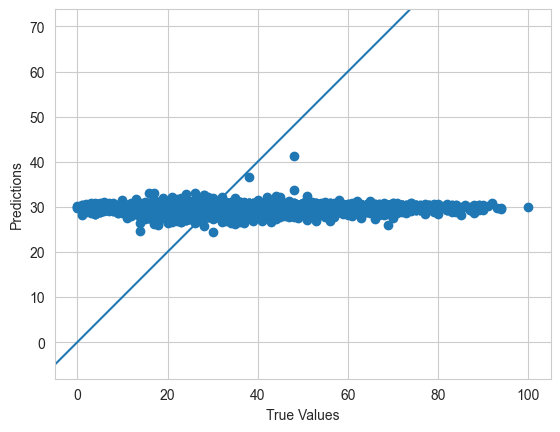

In [20]:
# plot some predictions
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])